## Feed-Forward Neural Network

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools

In [2]:
!pip install scikeras keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

ModuleNotFoundError: No module named 'tensorflow'

## Importing the dataset and sanity checks

In [4]:
df = pd.read_csv('features.csv')

x = df.drop(columns = ['Breed'])
y = df['Breed']
num_classes = 120
display(df.head())
print(f"Number of Breeds: {num_classes}")

,Breed,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,brittany_spaniel,-5.279870,-2.208426,5.211814,-8.099501,-13.185220,-0.753768,-3.015471,0.825370,-4.269372,...,-0.465695,-0.674558,0.123558,-1.240681,-1.069499,-0.714136,1.011624,-0.225715,-0.220330,1.140998
1,brittany_spaniel,0.524020,-4.321692,-5.808849,-0.097443,-13.157566,0.439865,-4.521323,-1.382092,-1.304059,...,-0.410429,0.396908,0.344853,0.243527,-0.416206,0.310021,0.025371,-0.221647,-0.306602,-0.855617
2,brittany_spaniel,4.484349,-11.409184,-2.061785,-8.795961,-10.736951,-0.650287,0.697348,8.464226,-2.961214,...,-1.486026,0.636264,-0.315544,1.400241,-0.116869,-0.253275,0.918089,-0.645903,0.545067,-1.274210
3,brittany_spaniel,8.630311,-9.028896,-4.177602,-3.575223,-7.698362,-5.857273,-3.473359,6.915802,1.972978,...,-1.718268,0.056995,0.152345,0.562226,0.279578,-0.277104,-0.956852,-0.531012,0.249064,-1.877944
4,brittany_spaniel,-6.459163,-5.178344,3.182314,-6.884826,-2.663270,-0.779802,-0.788943,4.521932,-3.636744,...,-0.964177,0.368517,-0.274313,-0.534803,0.797063,-0.156896,1.027882,1.130965,0.696718,0.098893


Number of Breeds: 120


In [5]:
# Define hyperparameters

# TEST_SIZE = 0.4
# LEARN_RATE = 0.001
# FIRST_LAYER = 128 
# ACTIVATION_1 = 'relu'
# SECOND_LAYER = 64
# ACTIVATION_2 = 'relu'
# ACTIVATION_OUT = 'softmax'
# LOSS_TYPE = 'categorical_crossentropy'
# METRICS = ['accuracy']
# EPOCHS = 20


In [6]:
param_grid = {
    'first_layer': [2, 4, 8, 32, 64, 128],
    'second_layer': [4, 16, 32, 64],
    'activation_1': ['relu', 'tanh'],
    'activation_2': ['relu', 'tanh'],
    'activation_out': ['softmax'],
    'learn_rate': [0.0001, 0.0005, 0.001, 0.005, .01],
    'batch_size' : [20, 50, 100],
    'epochs' : [10, 20]
}
ACTIVATION_1 = 'relu'
ACTIVATION_2 = 'relu'
ACTIVATION_OUT = 'softmax'
TEST_SIZE = 0.25
EPOCHS = 20
METRICS = ['accuracy']
LOSS_TYPE = 'categorical_crossentropy'

In [7]:
x = df.drop(columns=['Breed'])
y = df['Breed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = TEST_SIZE)

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the encoded labels to one-hot encoding
y_train = to_categorical(y_train_encoded, num_classes=num_classes)
y_test = to_categorical(y_test_encoded, num_classes=num_classes)

NameError: name 'train_test_split' is not defined

## Creating the model framework and running a sample model

In [8]:
def create_model(first_layer=128, activation_1='relu', second_layer=64, activation_2='relu', activation_out='softmax', learn_rate=0.001):
    model = Sequential()
    model.add(Dense(first_layer, input_shape=(100,), activation=activation_1))
    model.add(Dense(second_layer, activation=activation_2))
    model.add(Dense(num_classes, activation=activation_out))
    model.compile(optimizer=Adam(learning_rate=learn_rate), loss=LOSS_TYPE, metrics=METRICS)
    return model

model = create_model()

# Train the model
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(x_test, y_test))

# Make predictions
y_pred = model.predict(x_test)

NameError: name 'Sequential' is not defined

In [9]:
# Convert continuous predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test back to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Inverse transform the predicted and ground truth class labels to original breed names
y_pred_breed = label_encoder.inverse_transform(y_pred_classes)
y_test_breed = label_encoder.inverse_transform(y_test_classes)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(y_test_breed, y_pred_breed))

print("Classification Report : ")
print(classification_report(y_test_breed, y_pred_breed))

NameError: name 'y_pred' is not defined

In [10]:
def perform_grid_search(x_train, y_train, x_test, y_test, param_grid):
    best_accuracy = 0
    best_params = {}

    # Iterate over all combinations of hyperparameters
    for batch_size, epoch, first_layer, second_layer, learn_rate in itertools.product(param_grid['batch_size'], param_grid['epochs'], param_grid['first_layer'], param_grid['second_layer'], param_grid['learn_rate']):
        # Build the model
        model = Sequential()
        model.add(Dense(first_layer, input_shape=(100,), activation=ACTIVATION_1))  # Assuming 100 features
        model.add(Dense(second_layer, activation=ACTIVATION_2))
        model.add(Dense(num_classes, activation=ACTIVATION_OUT))  # num_classes is the number of unique breed labels
        model.compile(optimizer=Adam(learning_rate=learn_rate), loss=LOSS_TYPE, metrics=METRICS)
        
        # Train the model
        model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, verbose=0)
        
        # Evaluate the model
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
        
        # Check if current combination is better than the previous best
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {
                'batch_size': batch_size,
                'epochs': epoch,
                'first_layer': first_layer,
                'second_layer': second_layer,
                'learn_rate': learn_rate
            }

    return best_accuracy, best_params

# Usage example:
best_accuracy, best_params = perform_grid_search(x_train, y_train, x_test, y_test, param_grid)
print("Best accuracy: %f" % best_accuracy)
print("Best parameters:", best_params)

NameError: name 'x_train' is not defined

## Using the optimal hyperparameters

In [11]:
x = df.drop(columns=['Breed'])
y = df['Breed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = TEST_SIZE)

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the encoded labels to one-hot encoding
y_train = to_categorical(y_train_encoded, num_classes=num_classes)
y_test = to_categorical(y_test_encoded, num_classes=num_classes)

optimal = create_model(first_layer=128, activation_1='relu', second_layer=64, activation_2='relu', activation_out='softmax', learn_rate=0.0005)
optimal.fit(x_train, y_train, epochs=EPOCHS, batch_size=50, validation_data=(x_test, y_test))

# Make predictions
y_pred_opt = model.predict(x_test)

# Convert continuous predictions to class labels
y_pred_classes = np.argmax(y_pred_opt, axis=1)

# Convert one-hot encoded y_test back to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Inverse transform the predicted and ground truth class labels to original breed names
y_pred_breed = label_encoder.inverse_transform(y_pred_classes)
y_test_breed = label_encoder.inverse_transform(y_test_classes)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

multi_conf_matrix = multilabel_confusion_matrix(y_test_breed, y_pred_breed)
print("Confusion Matrix for each label : ")
print(multi_conf_matrix)

print("Classification Report : ")
print(classification_report(y_test_breed, y_pred_breed))

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

NameError: name 'train_test_split' is not defined

In [12]:
def plot_top_misclassified_breeds_percentage(conf_matrix, label_encoder, num_breeds=10):
    # Compute the misclassification rate for each breed
    misclassified_rates = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
    total_samples_per_breed = np.sum(conf_matrix, axis=1)
    misclassified_rates = misclassified_rates / total_samples_per_breed

    # Get the breed names from the label encoder
    breed_names = label_encoder.classes_

    # Sort the breeds based on misclassification rates
    sorted_indices = np.argsort(misclassified_rates)[::-1]

    # Select the top misclassified breeds
    selected_breeds = breed_names[sorted_indices[:num_breeds]]
    selected_misclassification_rates = misclassified_rates[sorted_indices[:num_breeds]]

    # Plot the misclassification rates
    plt.figure(figsize=(10, 8))
    plt.barh(selected_breeds, selected_misclassification_rates, color='skyblue')
    plt.xlabel('Misclassification Rate')
    plt.title('Top Misclassified Breeds by Percentage')
    plt.gca().invert_yaxis()
    plt.show()

# Usage:
# Assuming you have your confusion matrix stored in a variable called `conf_matrix`
# and you have your label encoder stored in a variable called `label_encoder`
plot_top_misclassified_breeds_percentage(conf_matrix, label_encoder, num_breeds=40)


NameError: name 'conf_matrix' is not defined

In [13]:
def plot_top_predicted_breeds_performance(conf_matrix, label_encoder, num_breeds=10, scale_factor=0.5):
    # Compute the correct classification rate for each breed
    correct_classification_rates = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

    # Compute the misclassification rate for each breed
    misclassified_rates = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
    total_samples_per_breed = np.sum(conf_matrix, axis=1)
    misclassified_rates = misclassified_rates / total_samples_per_breed

    # Scale the rates
    correct_classification_rates_scaled = correct_classification_rates * scale_factor
    misclassified_rates_scaled = misclassified_rates * scale_factor

    # Get the breed names from the label encoder
    breed_names = label_encoder.classes_

    # Sort the breeds based on correct classification rates
    sorted_indices = np.argsort(correct_classification_rates)[::-1]

    # Select the top predicted breeds
    selected_breeds = breed_names[sorted_indices[:num_breeds]]
    selected_correct_rates = correct_classification_rates_scaled[sorted_indices[:num_breeds]]
    selected_misclassification_rates = misclassified_rates_scaled[sorted_indices[:num_breeds]]

    # Plot the performance rates
    plt.figure(figsize=(10, 8))
    plt.barh(selected_breeds, selected_correct_rates, color='skyblue', label='Correct Classification Rate')
    plt.barh(selected_breeds, selected_misclassification_rates, left=selected_correct_rates, color='red', label='Misclassification Rate')
    plt.xlabel('Scaled Rate')
    plt.title('Top Predicted Breeds Performance (Scaled)')
    plt.legend()
    plt.gca().invert_yaxis()
    plt.show()

# Usage:
# Assuming you have your confusion matrix stored in a variable called `conf_matrix`
# and you have your label encoder stored in a variable called `label_encoder`
plot_top_predicted_breeds_performance(conf_matrix, label_encoder, num_breeds=40, scale_factor=1)


NameError: name 'conf_matrix' is not defined

In [14]:
def plot_top_predicted_breeds_performance(conf_matrix, label_encoder, num_breeds=10, scale_factor=0.5, misclassification_factor=2):
    # Compute the correct classification rate for each breed
    correct_classification_rates = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

    # Compute the misclassification rate for each breed
    misclassified_rates = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
    total_samples_per_breed = np.sum(conf_matrix, axis=1)
    misclassified_rates = misclassified_rates / total_samples_per_breed

    # Scale the rates
    correct_classification_rates_scaled = correct_classification_rates * scale_factor
    misclassified_rates_scaled = misclassified_rates * scale_factor * misclassification_factor

    # Normalize the scaled rates
    total_scaled_rates = correct_classification_rates_scaled + misclassified_rates_scaled
    correct_classification_rates_scaled_normalized = correct_classification_rates_scaled / total_scaled_rates
    misclassified_rates_scaled_normalized = misclassified_rates_scaled / total_scaled_rates

    # Get the breed names from the label encoder
    breed_names = label_encoder.classes_

    # Sort the breeds based on correct classification rates
    sorted_indices = np.argsort(correct_classification_rates)[::-1]

    # Select the top predicted breeds
    selected_breeds = breed_names[sorted_indices[:num_breeds]]
    selected_correct_rates = correct_classification_rates_scaled_normalized[sorted_indices[:num_breeds]]
    selected_misclassification_rates = misclassified_rates_scaled_normalized[sorted_indices[:num_breeds]]

    # Plot the performance rates
    plt.figure(figsize=(10, 8))
    plt.barh(selected_breeds, selected_correct_rates, color='green', label='Correct Classification Rate')
    plt.barh(selected_breeds, selected_misclassification_rates, left=selected_correct_rates, color='red', label='Misclassification Rate')
    plt.xlabel('Normalized Rate')
    plt.title('Top Predicted Breeds Performance (Scaled & Normalized)')
    plt.legend()
    plt.gca().invert_yaxis()
    plt.show()

# Usage:
# Assuming you have your confusion matrix stored in a variable called `conf_matrix`
# and you have your label encoder stored in a variable called `label_encoder`
plot_top_predicted_breeds_performance(conf_matrix, label_encoder, num_breeds=40, scale_factor=0.2, misclassification_factor=5)


NameError: name 'conf_matrix' is not defined

In [15]:
## Plots

<Axes: >

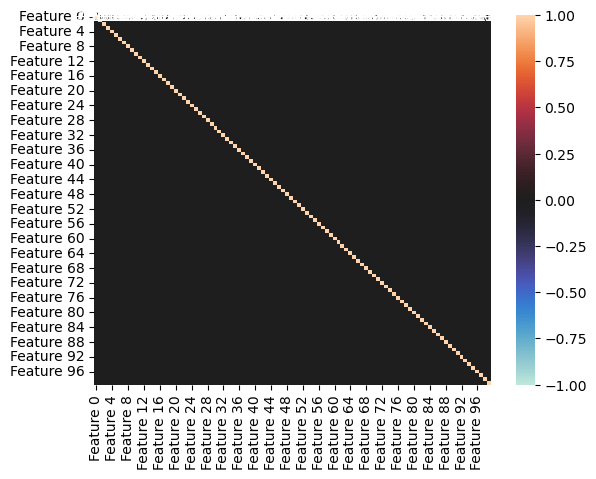

In [27]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('features.csv')
data = data = df.copy().drop(columns=['Breed']).corr()
sns.heatmap(data, annot=True, vmin=-1, vmax=1, center=0)

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
# sns.pairplot(data, hue='origin')